In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [145]:
data = pd.read_csv('C:/Users/ADMIN/Desktop/인공지능/diabetes.csv')

In [146]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [147]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [148]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

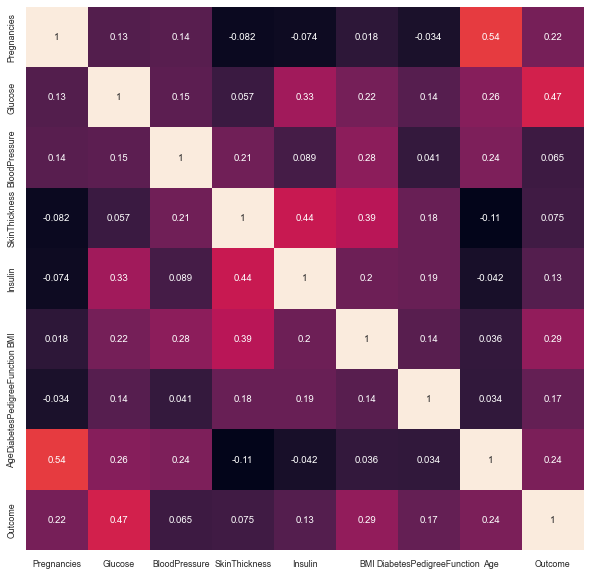

In [149]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [150]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [151]:
#Set x and y values
y=data.Outcome.values
x_df=data.drop('Outcome',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [152]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


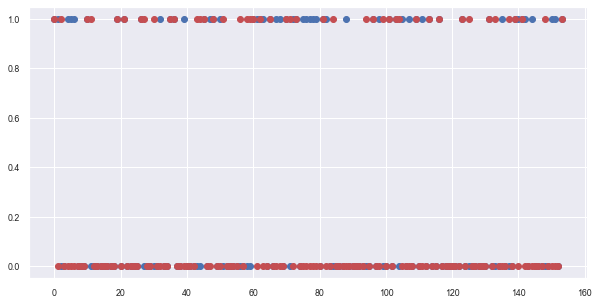

In [154]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_dt, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [155]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.5640760748177662


In [156]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

1.0


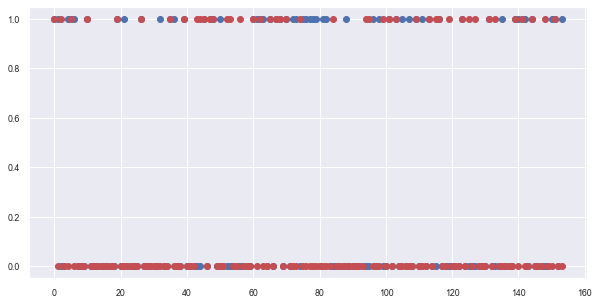

In [157]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_rf, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 


In [158]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.5465357250000211


In [159]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.7850162866449512


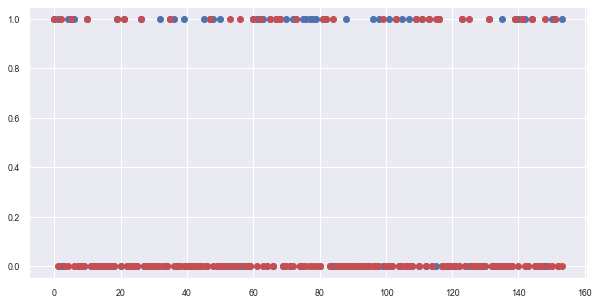

In [160]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_lr, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [161]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.4901629731627434


In [162]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=10)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.8078175895765473


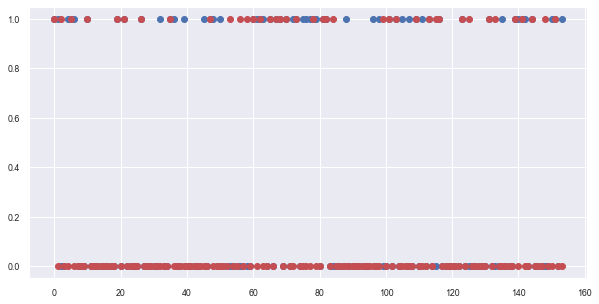

In [163]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_svm, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [164]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.4901629731627434


In [165]:
data.drop(columns=['Outcome'], inplace=True)

In [166]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [168]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [169]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) 
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [ 0.3  1.3 -0.3  0.  -0.3  0.9  0.4  0.1]
상수항(절편): -0.8


In [170]:
linear_y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [171]:
mse = mean_squared_error(y_test, linear_y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, linear_y_preds):.3f}')

MSE : 0.180, RMSE: 0.424
Variance score : 0.222


In [172]:
print("절편 값:", lr.intercept_)

print("회귀계수:", np.round(lr.coef_,1))

절편 값: -0.8492466721255421
회귀계수: [ 0.3  1.3 -0.3  0.  -0.3  0.9  0.4  0.1]


In [173]:
data.drop(columns=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], inplace=True)

In [174]:
data.head()

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1


In [175]:
X = data['BMI'].values.reshape(-1, 1)

In [176]:
y = data['Glucose'].values.reshape(-1, 1)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [178]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

0.38599348534201955


In [179]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 49.12533665328617


In [180]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14568\2174469151.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.38599348534201955


In [181]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 47.57243281183298


In [182]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.035830618892508145


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 31.204291246682597


In [184]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=10)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.04071661237785016


In [185]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 33.899105455002065
